In [1]:
from real_datasets import BreastCancerDataset, WineQualityRedDataset, WineQualityWhiteDataset, SouthGermanCreditDataset, CropMappingDataset

In [1]:
from solvers import GurobiSolver, CplexSolver

In [3]:
bc = BreastCancerDataset()
wqr = WineQualityRedDataset()
wqw = WineQualityWhiteDataset()
sgc = SouthGermanCreditDataset()
cm = CropMappingDataset()

In [4]:
ls = [bc, wqr, wqw, sgc, cm]
# ls = [bc]
# ls = [cm]

In [5]:
final_res = []

In [7]:
for idx, dataset in enumerate(ls):
    print(idx)
    P, N = dataset.generate()
    t0, t1, t, l = dataset.params()
    gb = GurobiSolver(P=P, N=N, theta=t, lambda_param=l)
    gb_obj, gb_nodes, _ = gb.solve()
    cp = CplexSolver(P=P, N=N, theta=t, lambda_param=l)
    cp_obj, cp_nodes, _ = cp.solve()
    final_res.append(([gb_obj, gb_nodes], [cp_obj, cp_nodes]))
    print(final_res)

0
Set parameter LicenseID to value 2604237
Solver status: 101 (integer optimal solution)
[([357, 27759], [357, 0])]
1
Solver status: 101 (integer optimal solution)
[([357, 27759], [357, 0]), ([18, 503], [18, 0])]
2
Solver status: 101 (integer optimal solution)
[([357, 27759], [357, 0]), ([18, 503], [18, 0]), ([180, 1829], [180, 0])]
3
Solver status: 101 (integer optimal solution)
[([357, 27759], [357, 0]), ([18, 503], [18, 0]), ([180, 1829], [180, 0]), ([700, 21198], [700, 0])]
4
Solver status: 101 (integer optimal solution)
[([357, 27759], [357, 0]), ([18, 503], [18, 0]), ([180, 1829], [180, 0]), ([700, 21198], [700, 0]), ([2674, 1], [2674, 0])]


In [8]:
final_res

[([357, 27759], [357, 0]),
 ([18, 503], [18, 0]),
 ([180, 1829], [180, 0]),
 ([700, 21198], [700, 0]),
 ([2674, 1], [2674, 0])]

In [3]:
from synthetic_datasets import ClusterDataset, TwoClusterDataset, DiffusedBenchmark, PrismDataset

In [4]:
cd = ClusterDataset()
tc = ClusterDataset() 
db = DiffusedBenchmark() 
pd = PrismDataset()

2
0.703452458112659
0.703452458112659


In [4]:
sds = [cd, tc, db, pd]

In [5]:
sy_final_res = []

In [6]:
for idx, dataset in enumerate(sds):
    print(idx)
    P, N = dataset.generate()
    t0, t1, t, l = dataset.params()
    gb = GurobiSolver(P=P, N=N, theta=t, lambda_param=l)
    gb_obj, gb_nodes, _ = gb.solve()
    cp = CplexSolver(P=P, N=N, theta=t, lambda_param=l)
    cp_obj, cp_nodes, _ = cp.solve()
    sy_final_res.append(([gb_obj, gb_nodes], [cp_obj, cp_nodes]))
    print(sy_final_res)

0
Set parameter LicenseID to value 2604237
[([80, 255], [80, 0])]
1
[([80, 255], [80, 0]), ([80, 531], [80, 0])]
2
[([80, 255], [80, 0]), ([80, 531], [80, 0]), ([200, 8818], [200, 0])]
3
[([80, 255], [80, 0]), ([80, 531], [80, 0]), ([200, 8818], [200, 0]), ([12, 30], [12, 0])]


In [7]:
sy_final_res

[([80, 255], [80, 0]),
 ([80, 531], [80, 0]),
 ([200, 8818], [200, 0]),
 ([12, 30], [12, 0])]

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from utils import plot_P_N

In [7]:
P, N = pd.generate()

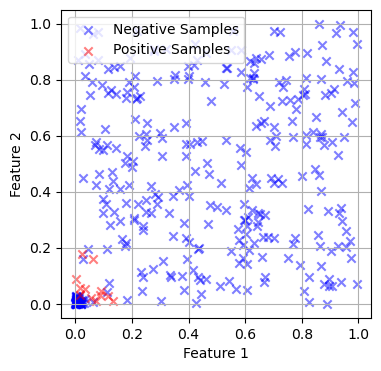

In [8]:
plot_P_N(P, N)